# sklearn Exercise - Poisson Regression

The aim with this exercise is to to continue to work with sklearn on logistic regressions.

You can find more details of the package here: https://scikit-learn.org/stable/index.html

NOTE: We will import the modules as they are needed.

In [27]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## Get the Data

We will use an awards competition dataset.

The name of the dataset is [competition_awards](https://drive.google.com/uc?id=1LXQqzgO3QNT83k9LtsKI0pNCR_FfvLks).

This dataset shows the number of awards each of 200 students had received and their math scores.

This dataset includes the following features:
* 'Awards': number of awards received
* 'Math Score': math score on tests

You will need to upload the file to your internal Google Drive and define the absolute path

In [28]:
df = pd.read_csv('competition_awards_data.csv')
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


Check the the dataset information to review how the data looks and some of their descriptive statistics.

In [29]:
## CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Awards      200 non-null    int64
 1   Math Score  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


## Exploratory Data Analysis

Create a scatter plot of the awards vs the math score.

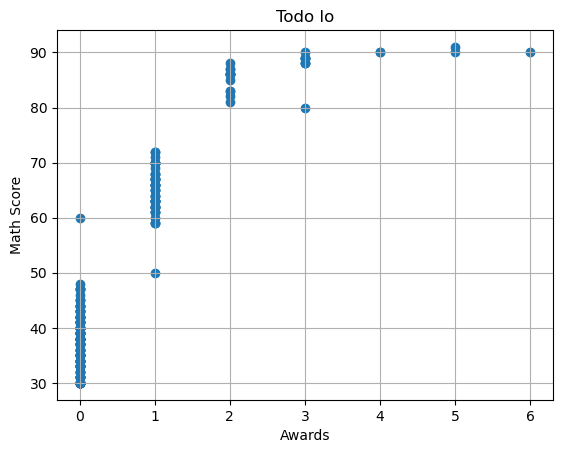

In [30]:
## CODE HERE
plt.scatter(df['Awards'], df['Math Score'])
plt.title('Todo lo')
plt.xlabel('Awards')
plt.ylabel('Math Score')
plt.grid(True)
plt.show()

Create an histogram of the awards.

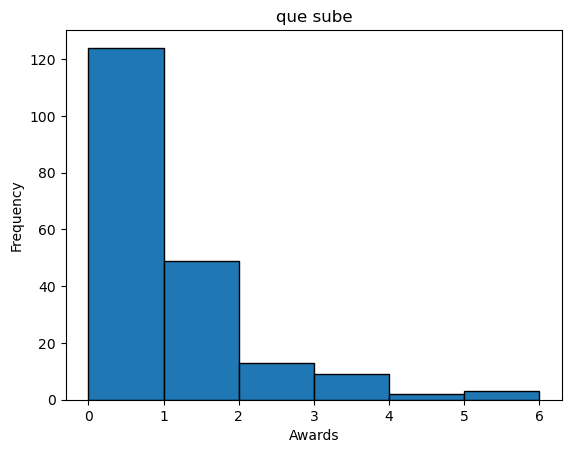

In [31]:
## CODE HERE
plt.hist(df['Awards'], bins=range(int(df['Awards'].max()+1)), edgecolor='black')
plt.title('que sube')
plt.xlabel('Awards')
plt.ylabel('Frequency')
plt.show()

Create an histogram of the Math Score.

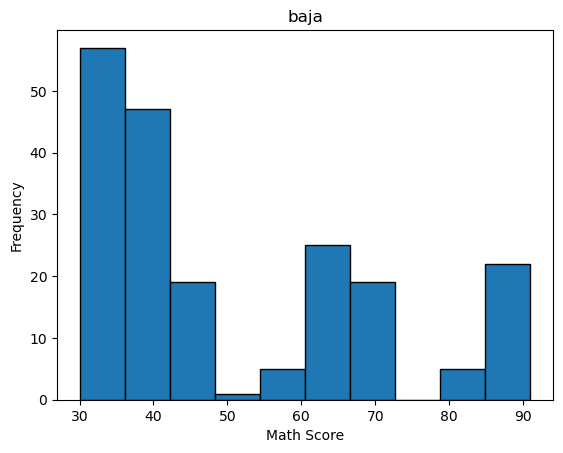

In [32]:
## CODE HERE
plt.hist(df['Math Score'], bins=10, edgecolor='black')  # Adjust bins if necessary
plt.title('baja')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

# Poisson Regression

We will use sklearn's train_test_split to split the data into training and testing sets.

Use a train size of 0.8 and random state equal to 1.
Pass as a parameter your full dataframe.

Note: Remember to import the function

In [33]:
## CODE HERE

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=1)

Set your X and Y training variables

X is equal to Math Score
Y is equal to Awards

Hint: You will need to reshape your array to appear as a 2D with dimensions samplesx1

Check the shape of your variables

In [34]:
## CODE HERE
X_train = train_set['Math Score'].values.reshape(-1, 1)  
Y_train = train_set['Awards'].values
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (160, 1)
Y_train shape: (160,)


Set your X and Y testing variables

Hint: You will need the same reformulation as in training

In [35]:
## CODE HERE
X_test = test_set['Math Score'].values.reshape(-1, 1) 
Y_test = test_set['Awards'].values
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_test shape: (40, 1)
Y_test shape: (40,)


## Training the model

We will use sklearn's [Poisson Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html).

Import the module and create an instance of the Poisson Regressor.

In [36]:
## CODE HERE
from sklearn.linear_model import PoissonRegressor
poisson_reg = PoissonRegressor()

In [37]:
## CODE HERE

Then, *fit* the training data into this model.

In [38]:
## CODE HERE
poisson_reg.fit(X_train, Y_train)

PoissonRegressor()

## Predicting Test Data

Once you had fit the model, you can evaluate the performance of the model using the test data.

Thus, *predict* the results using the *X* test data.

In [39]:
## CODE HERE
Y_pred = poisson_reg.predict(X_test)

## Evaluating the Model

We will use sklearn's [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) module to evaluate the perfomance of the model.

To evaluate the performance, we will use sklearn's [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

Remember to import the module.

In [40]:
## CODE HERE
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print("R2 score:", r2)

R2 score: 0.8371373661390162


Calculate your R2 score using your testing versus your prediction data.

In [41]:
## CODE HERE
r2_test = r2_score(Y_test, Y_pred)
print("R² score for testing data:", r2_test)

R² score for testing data: 0.8371373661390162


We will evaluate the performance of the model on the training data.

Thus, *predict* the results using the *X* train data

In [42]:
## CODE HERE
Y_train_pred = poisson_reg.predict(X_train)

Calculate your R2 score using your training versus your prediction data out of training.

In [43]:
## CODE HERE
r2_train = r2_score(Y_train, Y_train_pred)
print("R² score for training data:", r2_train)

R² score for training data: 0.858610788597759


Create a scatter plot where you the original vs the predicted values for both the training and testing data.

[Result](https://drive.google.com/uc?id=1wALnQQ95RBC6AcDVSLRNmfCvDQWcNnJd)

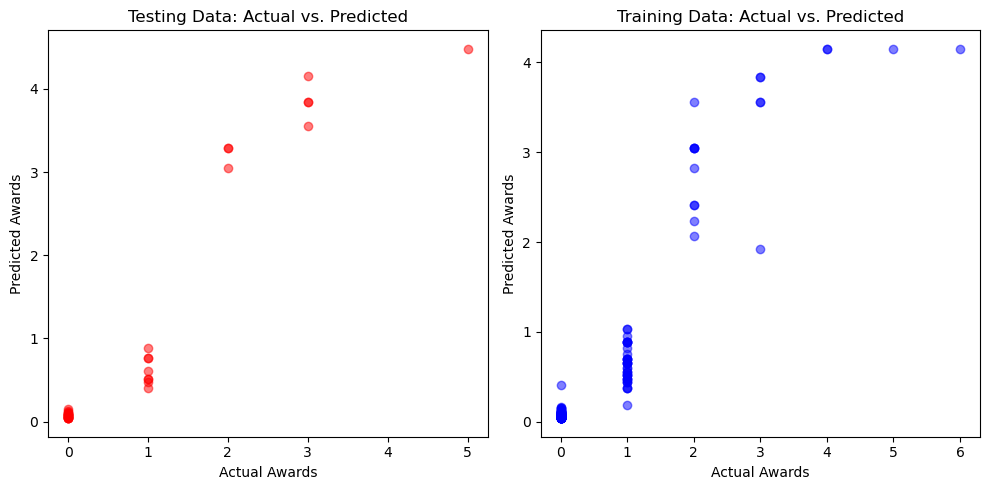

In [44]:
## CODE HERE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred, alpha=0.5, color='red')
plt.title('Testing Data: Actual vs. Predicted')
plt.xlabel('Actual Awards')
plt.ylabel('Predicted Awards')
plt.subplot(1, 2, 2)
plt.scatter(Y_train, Y_train_pred, alpha=0.5, color='blue')
plt.title('Training Data: Actual vs. Predicted')
plt.xlabel('Actual Awards')
plt.ylabel('Predicted Awards')
plt.tight_layout()
plt.show()

Create a new dataframe using your testing data where one column is the real test *Y* values and the other column are the predicted test values rounded up to the integer.

Show the head and descriptive statistics of this new dataframe

In [46]:
## CODE HERE
import numpy as np
results_df = pd.DataFrame({
    'Actual Awards': Y_test,
    'Predicted Awards': np.ceil(Y_pred)  
})
print(results_df.head())

   Actual Awards  Predicted Awards
0              0               1.0
1              0               1.0
2              1               1.0
3              0               1.0
4              2               4.0


In [47]:
## CODE HERE
print(results_df.describe())

       Actual Awards  Predicted Awards
count      40.000000         40.000000
mean        0.775000          1.650000
std         1.208676          1.331088
min         0.000000          1.000000
25%         0.000000          1.000000
50%         0.000000          1.000000
75%         1.000000          1.000000
max         5.000000          5.000000


Create a frequency table

Group by the counts of number of awards.

Each row on the table should correspond to the predicted number of awards.

Each column on the table should corresponds to the real number of awards

In [48]:
## CODE HERE
frequency_table = pd.crosstab(index=results_df['Predicted Awards'], columns=results_df['Actual Awards'])
print(frequency_table)

Actual Awards      0  1  2  3  5
Predicted Awards                
1.0               24  8  0  0  0
4.0                0  0  3  3  0
5.0                0  0  0  1  1


Congratulations on finishing Laboratory 8.